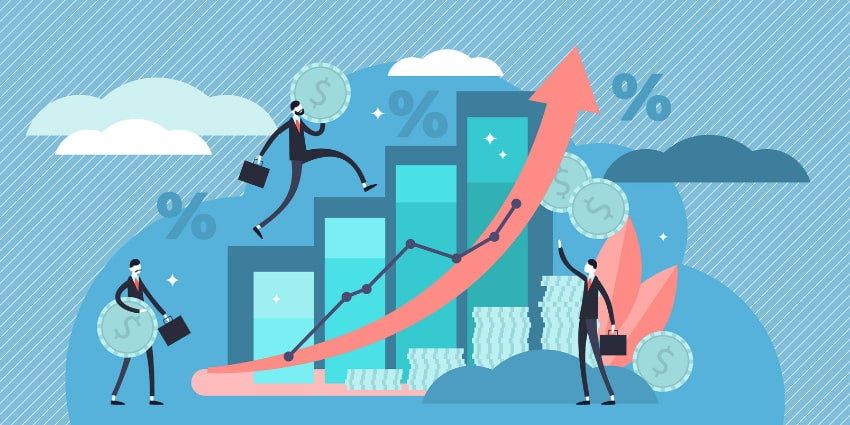

In [39]:
from IPython.display import Image
Image(filename=r'C:\Users\Admin\Desktop\prj\sales.jpg')


# Sales Forecasting For Supermarket

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn import metrics 

import warnings
warnings.filterwarnings("ignore")

In [47]:
data = pd.read_csv("supermarket_sales.csv")
pd.set_option('display.max_columns',None)
data.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [49]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [50]:
data_v1 = data.drop(columns=['Invoice ID','Date'], axis=1)

In [51]:


# checking the categorical variables
data_categorical = (data_v1.dtypes == 'object')
data_categorical_objects = list(data_categorical[data_categorical].index)
print(f'The categorical variables  {data_categorical_objects}')



The categorical variables  ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment']


In [52]:
data_v1_label = data_v1.copy()

# apply Ordinal Encoder 
ordinal_encoder = OrdinalEncoder()
data_v1_label[data_categorical_objects] = ordinal_encoder.fit_transform(data_v1_label[data_categorical_objects])

In [53]:
data_v1_label.head(3)

Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0     0.0   2.0            0.0     0.0           3.0       74.69         7   
1     2.0   1.0            1.0     0.0           0.0       15.28         5   
2     0.0   2.0            1.0     1.0           4.0       46.33         7   

    Tax 5%     Total   Time  Payment    cogs  gross margin percentage  \
0  26.1415  548.9715  146.0      2.0  522.83                 4.761905   
1   3.8200   80.2200   23.0      0.0   76.40                 4.761905   
2  16.2155  340.5255  155.0      1.0  324.31                 4.761905   

   gross income  Rating  
0       26.1415     9.1  
1        3.8200     9.6  
2       16.2155     7.4

In [54]:
# normalizing dataset
data_v2_label = Normalizer().fit_transform(data_v1_label.values)
data_v2_label

array([[0.        , 0.00257523, 0.        , ..., 0.0061315 , 0.03366018,
        0.0117173 ],
       [0.01740137, 0.00870068, 0.00870068, ..., 0.04143183, 0.03323661,
        0.08352657],
       [0.        , 0.00401625, 0.00200812, ..., 0.00956249, 0.03256273,
        0.01486012],
       ...,
       [0.        , 0.01218102, 0.        , ..., 0.02900243, 0.00969609,
        0.04689693],
       [0.        , 0.00699943, 0.00349971, ..., 0.0166653 , 0.01151756,
        0.01434883],
       [0.        , 0.00218293, 0.        , ..., 0.00519746, 0.03374706,
        0.00720368]])

In [96]:
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [80]:
city_count = data['City'].value_counts()
city_count_data = pd.DataFrame(city_count)
city_count_data


City
Yangon      340
Mandalay    332
Naypyitaw   328

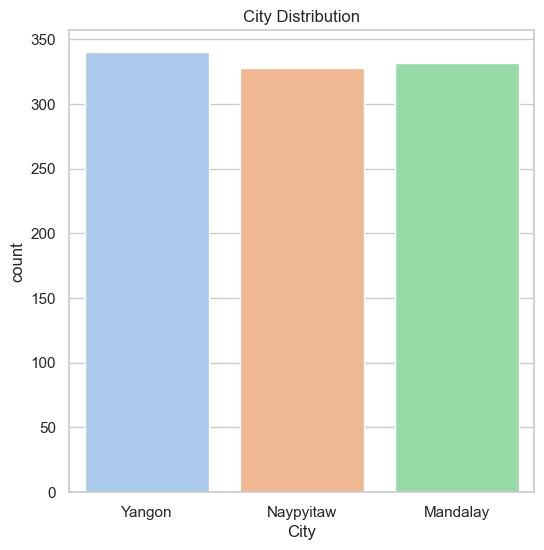

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Assuming the column is categorical (Yes/No)
sns.countplot(data=data, x='City', palette='pastel')
plt.title('City Distribution')
plt.show()

<Axes: xlabel='Invoice ID', ylabel='count'>

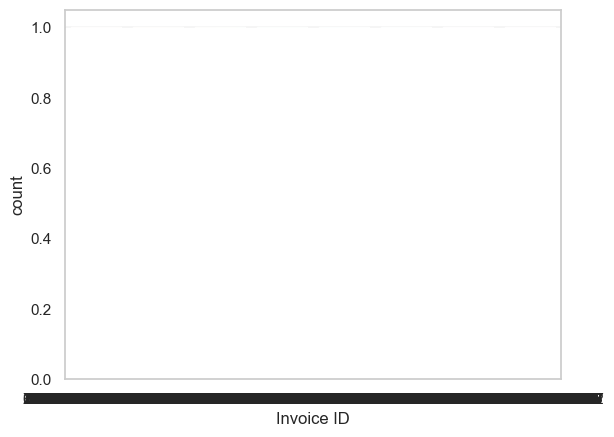

In [105]:
sns.countplot(data=data, x='Invoice ID')

<Axes: xlabel='Branch', ylabel='count'>

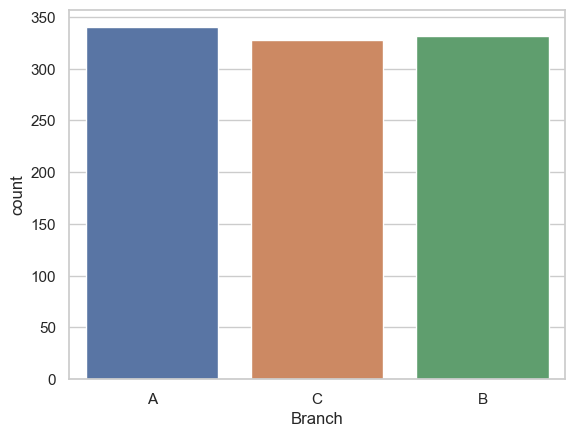

In [106]:
sns.countplot(data=data, x='Branch')

<Axes: xlabel='Gender', ylabel='count'>

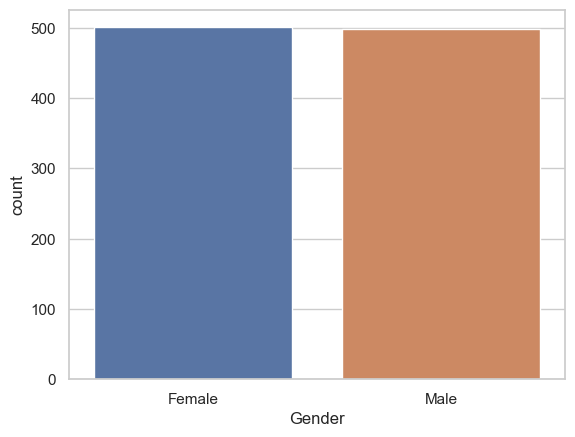

In [109]:
sns.countplot(data=data, x='Gender')

<Axes: xlabel='Product line', ylabel='count'>

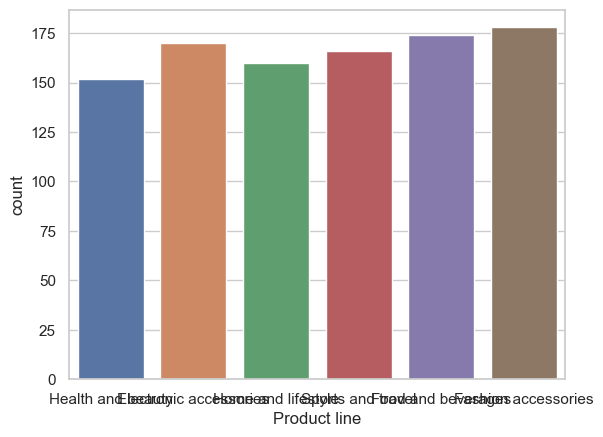

In [110]:
sns.countplot(data=data, x='Product line')

<Axes: xlabel='Unit price', ylabel='count'>

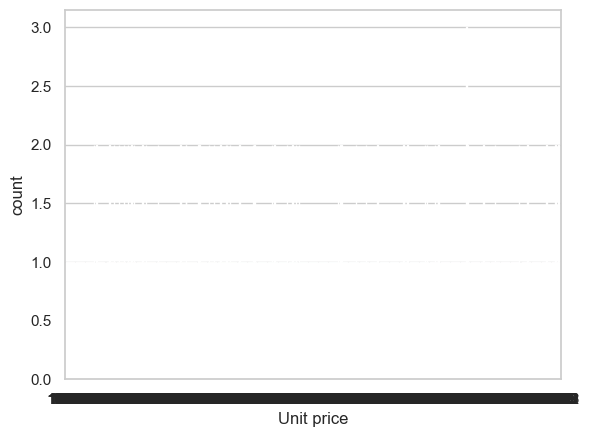

In [113]:
sns.countplot(data=data, x='Unit price')

<Axes: xlabel='Tax 5%', ylabel='count'>

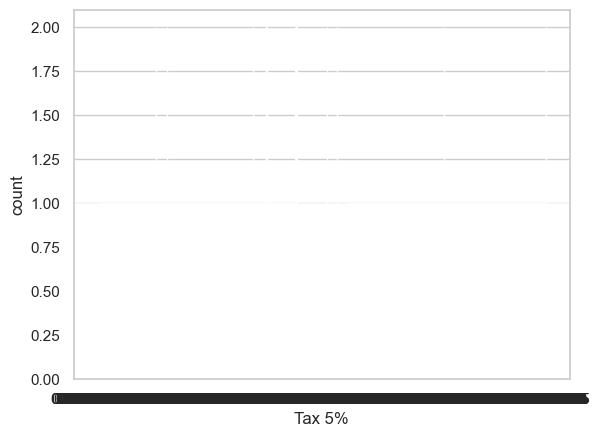

In [118]:
sns.countplot(data=data, x='Tax 5%')

<Axes: xlabel='Total', ylabel='count'>

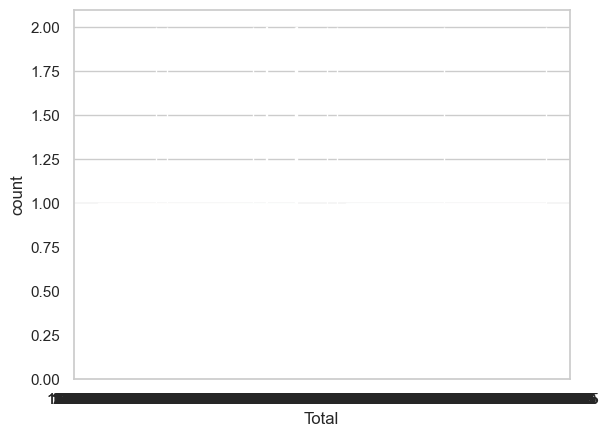

In [119]:
sns.countplot(data=data, x='Total')

<Axes: xlabel='Date', ylabel='count'>

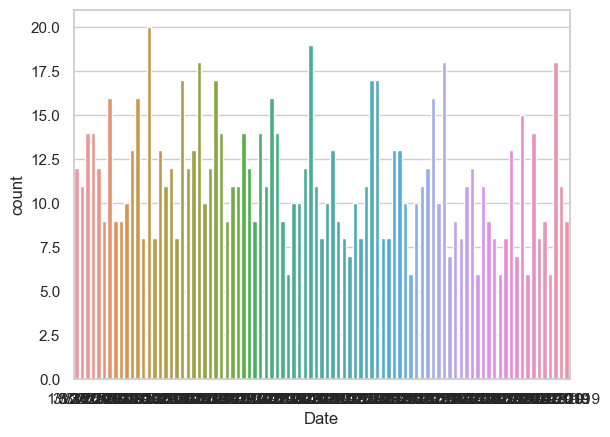

In [120]:
sns.countplot(data=data, x='Date')

<Axes: xlabel='Time', ylabel='count'>

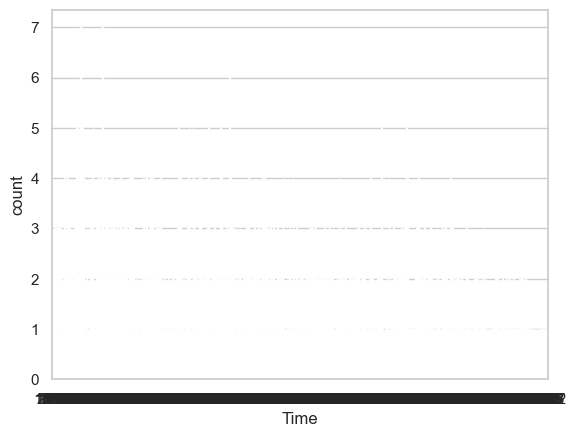

In [112]:
sns.countplot(data=data, x='Time')

<Axes: xlabel='Payment', ylabel='count'>

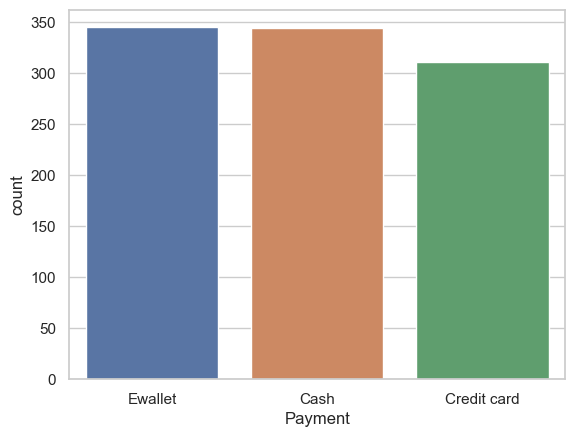

In [121]:
sns.countplot(data=data, x='Payment')

<Axes: xlabel='cogs', ylabel='count'>

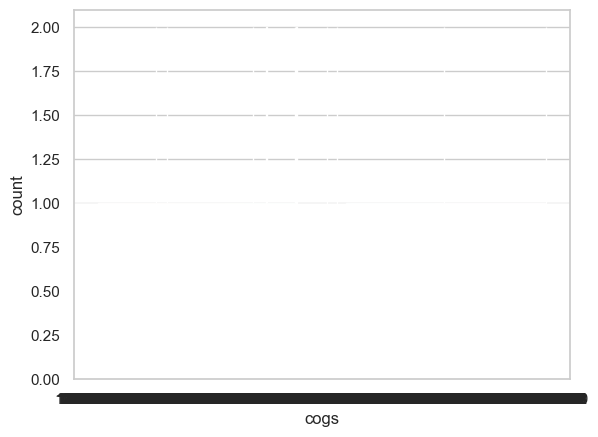

In [122]:
sns.countplot(data=data, x='cogs')

<Axes: xlabel='gross margin percentage', ylabel='count'>

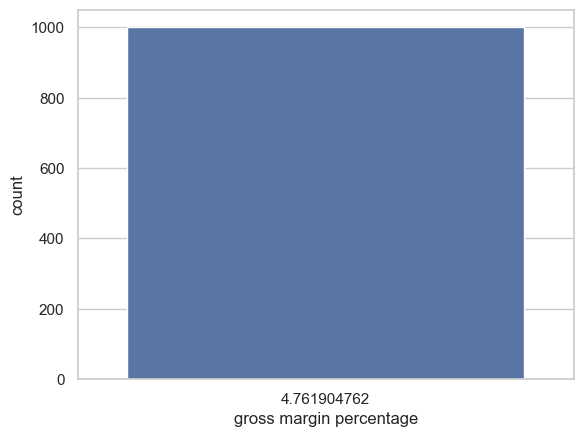

In [125]:
sns.countplot(data=data, x='gross margin percentage')

<Axes: xlabel='gross income', ylabel='count'>

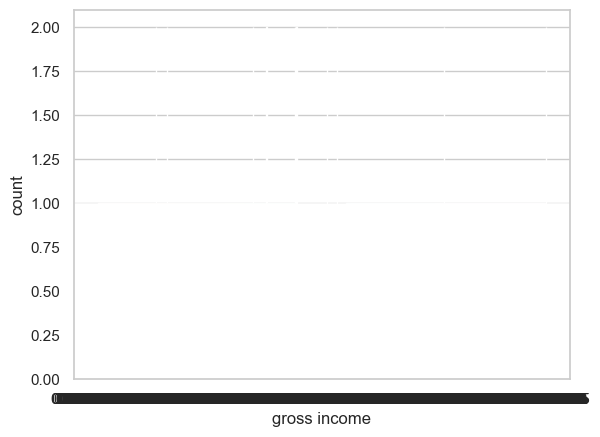

In [126]:
sns.countplot(data=data, x='gross income')

<Axes: xlabel='Rating', ylabel='count'>

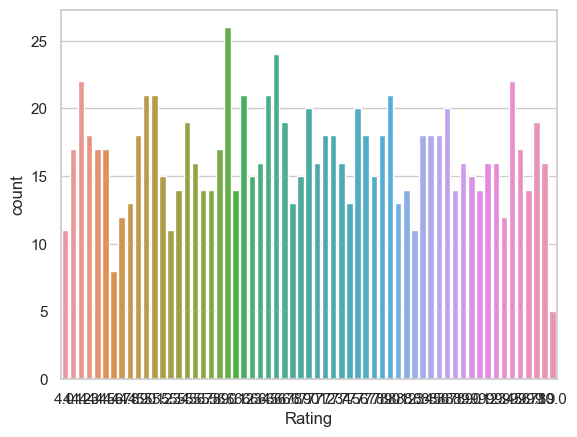

In [127]:
sns.countplot(data=data, x='Rating')

In [132]:
payment_dummies = pd.get_dummies(data['Payment'])
payment_dummies.head()

Cash  Credit card  Ewallet
0     0            0        1
1     1            0        0
2     0            1        0
3     0            0        1
4     0            0        1

In [133]:
data = pd.concat([data, payment_dummies], axis=1)
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

   Cash  Credit card  Ewallet  
0     0            0        1  
1     1            0        0  
2     0            1        0  
3     0            0        1  
4     0            0        1

In [88]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(data_v2_label)

In [89]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(data_v2_label,labels,metric='euclidean')
print(silhouette)

0.5177773832791779


In [90]:
dbs = metrics.davies_bouldin_score(data_v2_label,labels)
print(dbs)

0.6401892473669806


In [91]:


calinski = metrics.calinski_harabasz_score(data_v2_label,labels)
print(calinski)



2462.724305071512


In [59]:
def cluster_algo(n_clusters,dataset):

    kmeans = KMeans(n_clusters=n_clusters, n_init=30, max_iter=300)
    labels = kmeans.fit_predict(data_v2_label)
    
    silhouette = metrics.silhouette_score(data_v2_label,labels,metric='euclidean')
    dbs = metrics.davies_bouldin_score(data_v2_label,labels)
    calinski = metrics.calinski_harabasz_score(data_v2_label,labels)
    return silhouette, dbs, calinski
    

In [60]:
silhouette, dbs, calinski =  cluster_algo(3,data_v2_label)
print(silhouette, dbs, calinski)

0.5183237953130448 0.6362603978765979 2462.624377587723


In [61]:
silhouette_1, dbs_1, calinski_1 =  cluster_algo(5,data_v2_label)
print(silhouette_1, dbs_1, calinski_1)

0.44494658525440195 0.7470122535860813 2385.9249448177966


In [62]:


silhouette_3, dbs_3, calinski_3 = cluster_algo(20,data_v2_label)
print(silhouette_3, dbs_3, calinski_3)



0.3722410208415896 0.7991115241728407 2601.8234393749713


In [63]:


silhouette_4, dbs_4, calinski_4 = cluster_algo(50,data_v2_label)
print(silhouette_4, dbs_4, calinski_4)



0.3463190438781576 0.8385662623398532 2544.4945593927364


In [64]:
random_data = np.random.rand(1000,17)
silhouette, dbs, calinski = cluster_algo(5,random_data)

print(silhouette, dbs, calinski)
print(silhouette_1, dbs_1, calinski_1)
print(silhouette_2, dbs_2, calinski_2)
print(silhouette_3, dbs_3, calinski_3)
print(silhouette_4, dbs_4, calinski_4)

0.44494658525440195 0.7470122535860811 2385.9249448177966
0.44494658525440195 0.7470122535860813 2385.9249448177966


NameError: name 'silhouette_2' is not defined

In [65]:


set1, set2, set3 = np.array_split(data_v2_label,3)

silhouette1, dbs1, calinski1 = cluster_algo(3,set1)
silhouette2, dbs2, calinski2 = cluster_algo(3,set2)
silhouette3, dbs3, calinski3 = cluster_algo(3,set3)


print(silhouette1, dbs1, calinski1)
print(silhouette2, dbs2, calinski2)
print(silhouette3, dbs3, calinski3)



0.5177773832791779 0.6401892473669806 2462.724305071512
0.5172608108501502 0.640732174970779 2462.6225416057428
0.5173630388402617 0.6406445088469347 2462.617845083984


<Axes: >

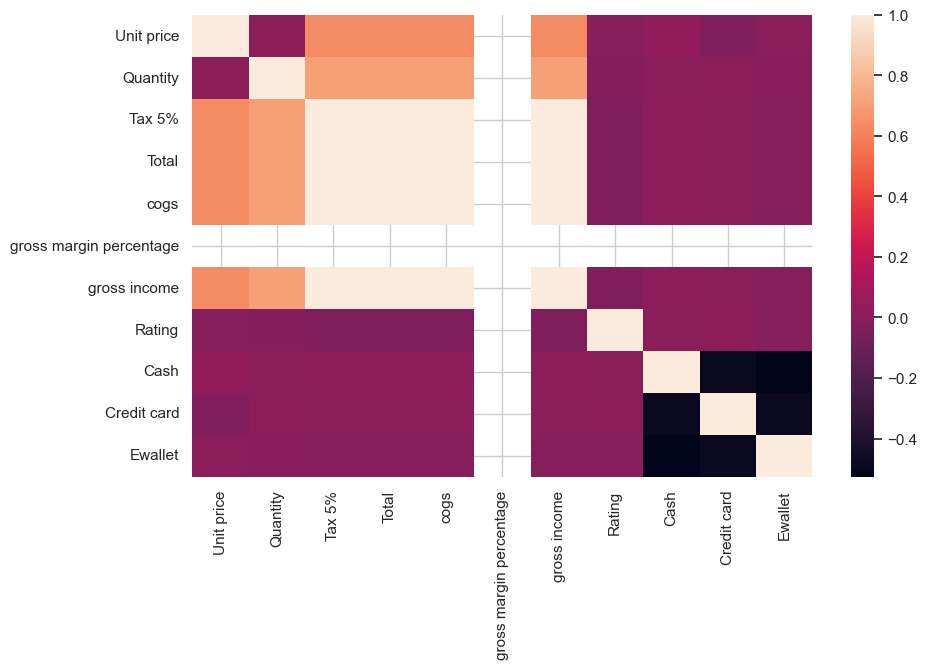

In [141]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [145]:
data.drop (['Gender', 'Branch'], axis=1, inplace=True)

In [146]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    else:
        data[column]=LabelEncoder().fit_transform(data[column])

In [147]:
data.head()

Invoice ID  City  Customer type  Product line  Unit price  Quantity  \
0         814     2              0             3       74.69         6   
1         142     1              1             0       15.28         4   
2         653     2              1             4       46.33         6   
3          18     2              0             3       58.22         7   
4         339     2              1             5       86.31         6   

    Tax 5%     Total  Date  Time  Payment    cogs  gross margin percentage  \
0  26.1415  548.9715    26   146        2  522.83                 4.761905   
1   3.8200   80.2200    87    23        0   76.40                 4.761905   
2  16.2155  340.5255    81   155        1  324.31                 4.761905   
3  23.2880  489.0480    19   485        2  465.76                 4.761905   
4  30.2085  634.3785    57    29        2  604.17                 4.761905   

   gross income  Rating  Cash  Credit card  Ewallet  
0       26.1415     9.1     0            0        1  
1        3.8200     9.6     1            0        0  
2       16.2155     7.4     0            1        0  
3       23.2880     8.4     0            0        1  
4       30.2085     5.3     0            0        1

In [148]:
data.dtypes

Invoice ID                   int64
City                         int64
Customer type                int64
Product line                 int64
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                         int64
Time                         int64
Payment                      int64
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Cash                         int64
Credit card                  int64
Ewallet                      int64
dtype: object

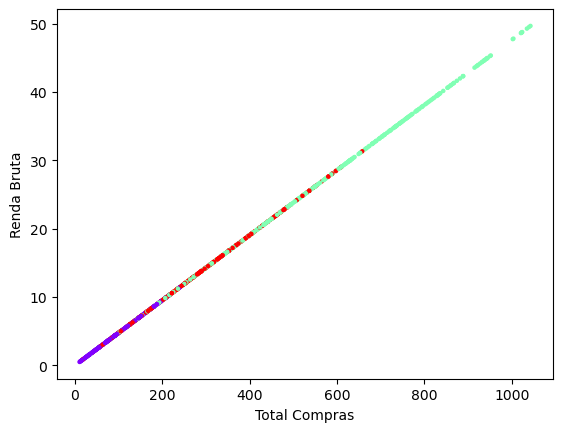

In [66]:
plt.scatter(data_v1_label['Total'],data_v1_label['gross income'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Total Compras')
plt.ylabel('Renda Bruta')
plt.show()

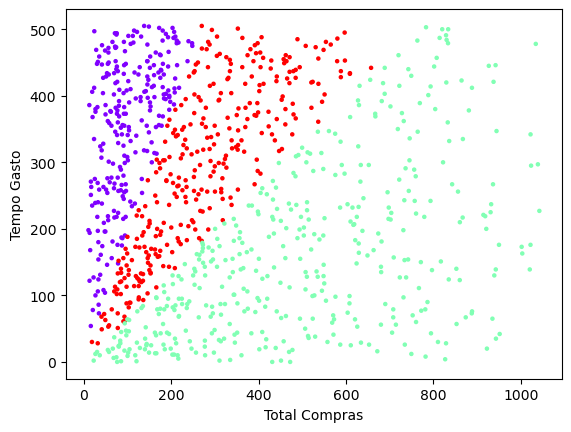

In [67]:
plt.scatter(data_v1_label['Total'],data_v1_label['Time'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Total Compras')
plt.ylabel('Tempo Gasto')
plt.show()

In [71]:
centroids = kmeans.cluster_centers_
max = len(centroids[0])
for i in range(max):
    print(data_v1_label.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

Branch 
0.0000
City 
0.0000
Customer type 
0.0000
Gender 
0.0000
Product line 
0.0000
Unit price 
0.0001
Quantity 
0.0000
Tax 5% 
0.0001
Total 
0.0328
Time 
0.0799
Payment 
0.0000
cogs 
0.0298
gross margin percentage 
0.0000
gross income 
0.0001
Rating 
0.0000


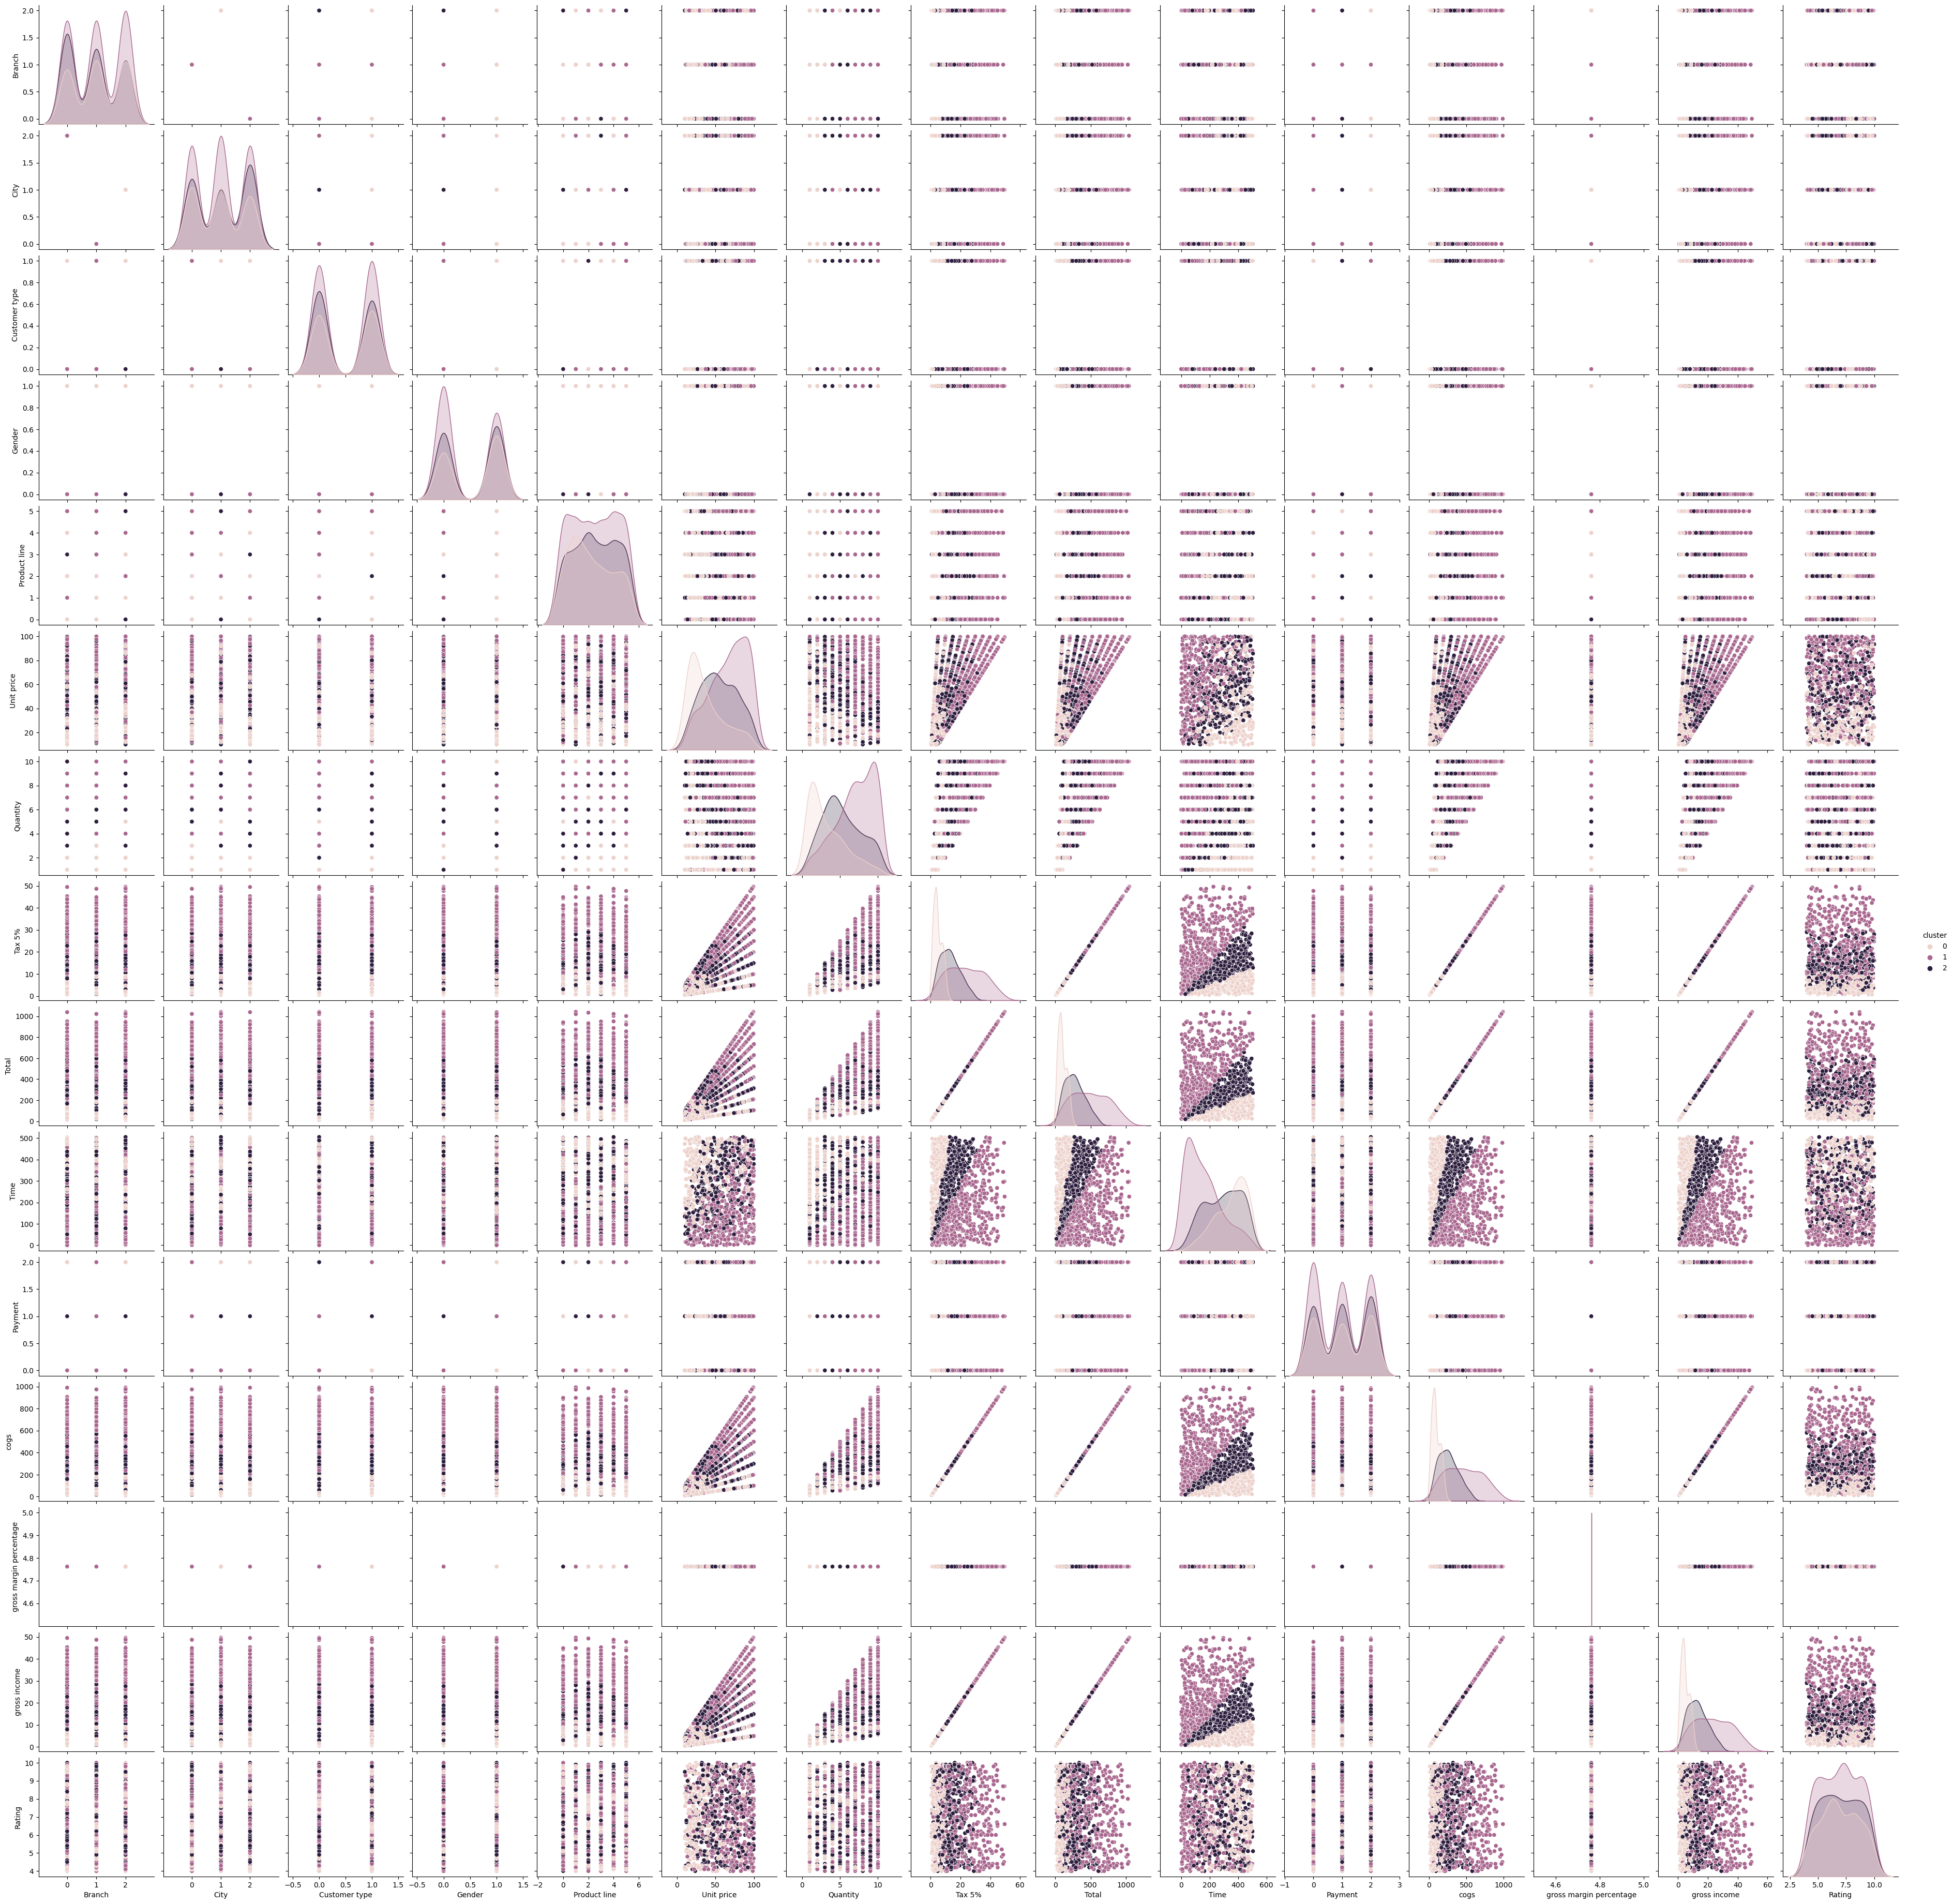

In [70]:
data_v1_label['cluster'] = labels
sns.pairplot(data_v1_label[0:], hue='cluster')

In [149]:
num_days = 30  # Number 
num_departments = 5  # Number of departments
initial_stock = 100  # Initial stock in each department
max_stock = 150  # Maximum stock allowed


In [150]:
# Simulate demand and stocking
np.random.seed(42)  # For reproducibility
demand_mean = 30
demand_std = 10

In [151]:
department_stock = pd.DataFrame(index=range(num_days), columns=range(num_departments))
department_stock.iloc[0, :] = initial_stock

In [152]:
for day in range(1, num_days):
    for dept in range(num_departments):
        demand = int(np.random.normal(demand_mean, demand_std))
        remaining_stock = department_stock.iloc[day - 1, dept] - demand
        if remaining_stock < 0:
            department_stock.iloc[day, dept] = max_stock  # Stock up if demand exceeds stock
        else:
            department_stock.iloc[day, dept] = remaining_stock


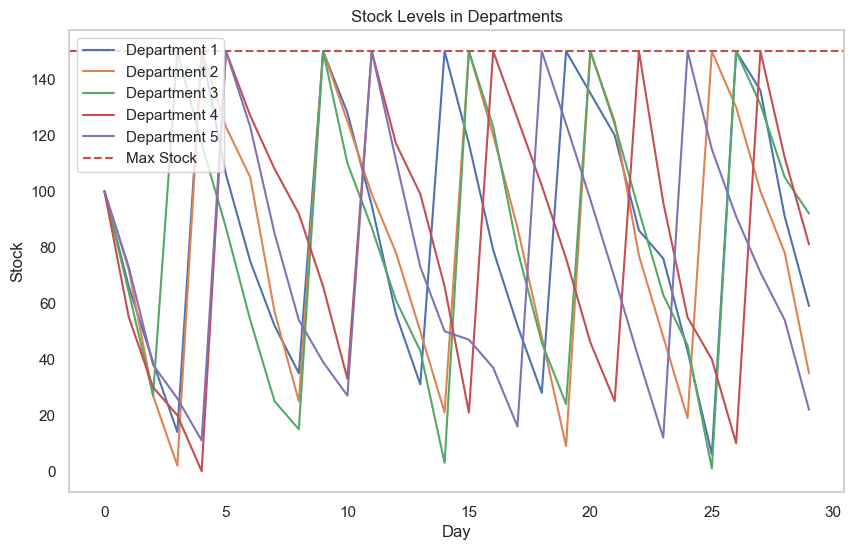

In [153]:

# Plotting
plt.figure(figsize=(10, 6))
for dept in range(num_departments):
    plt.plot(department_stock.index, department_stock.iloc[:, dept], label=f'Department {dept + 1}')

plt.axhline(y=max_stock, color='r', linestyle='--', label='Max Stock')
plt.title('Stock Levels in Departments')
plt.xlabel('Day')
plt.ylabel('Stock')
plt.legend()
plt.grid()
plt.show()